In [47]:
# Module initialization

import numpy as np
import matplotlib.pyplot as plt
import matplotlib

import torch
from PIL import Image
from torchvision import transforms

preprocess = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

from model import EarthVisionModel

In [48]:
# Load label

def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        _dict = pickle.load(fo, encoding='bytes')
    return _dict

label_meta = unpickle("./meta")

In [49]:
# Load model 

model = EarthVisionModel()

In [50]:
# Prepare flag array

flag = np.zeros((32,256))

In [51]:
# Load model that already train

model = EarthVisionModel()
model.load_state_dict(torch.load("state_dict.pt"))
model.eval()

MobileNetV2(
  (features): Sequential(
    (0): ConvBNActivation(
      (0): Conv2d(3, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (1): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): ConvBNActivation(
          (0): Conv2d(48, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=48, bias=False)
          (1): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(48, 24, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): ConvBNActivation(
          (0): Conv2d(24, 144, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(144, eps=1e-05, mom

In [52]:
# Load and process the test images
test_images = []
for i in range(8192):
    img = Image.open(f"test_X/{i}.jpg")
    img_tensor = preprocess(img)
    test_images.append(img_tensor.unsqueeze(0))

test_images = torch.cat(test_images, dim=0)

array([12, 17,  9, ..., 12, 17, 12], dtype=int64)


In [65]:
# Predict labels for the test images
with torch.no_grad():
    logits = model(test_images)
    _, predicted_labels = torch.max(logits, 1)
    predicted_labels = predicted_labels.numpy()

In [148]:

# Map classification to label 

from pprint import pprint as pp
pp(predicted_labels)
import numpy as np
import random

fine_label_names = label_meta[b'fine_label_names']
int_to_fine_label = {i: label_name.decode('utf-8') for i, label_name in enumerate(fine_label_names)}

array([12, 17,  9, ..., 12, 17, 12], dtype=int64)


In [149]:
# Map classification to random color

colors = {i: (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255)) for i in range(len(fine_label_names))}

{0: 0, 1: 7, 2: 106, 3: 4, 4: 9, 5: 17, 6: 22, 7: 0, 8: 1, 9: 37, 10: 16, 11: 238, 12: 1515, 13: 11, 14: 0, 15: 0, 16: 14, 17: 935, 18: 19, 19: 13, 20: 0, 21: 19, 22: 3, 23: 35, 24: 0, 25: 0, 26: 9, 27: 0, 28: 0, 29: 0, 30: 2, 31: 20, 32: 44, 33: 127, 34: 0, 35: 368, 36: 8, 37: 1200, 38: 20, 39: 12, 40: 1, 41: 0, 42: 5, 43: 11, 44: 0, 45: 5, 46: 245, 47: 0, 48: 21, 49: 31, 50: 10, 51: 0, 52: 0, 53: 0, 54: 10, 55: 24, 56: 17, 57: 0, 58: 14, 59: 37, 60: 35, 61: 0, 62: 4, 63: 16, 64: 9, 65: 6, 66: 5, 67: 3, 68: 1050, 69: 78, 70: 0, 71: 131, 72: 15, 73: 20, 74: 0, 75: 13, 76: 1053, 77: 0, 78: 1, 79: 0, 80: 13, 81: 110, 82: 0, 83: 2, 84: 42, 85: 64, 86: 0, 87: 3, 88: 23, 89: 0, 90: 50, 91: 0, 92: 3, 93: 0, 94: 9, 95: 25, 96: 35, 97: 22, 98: 90, 99: 0}


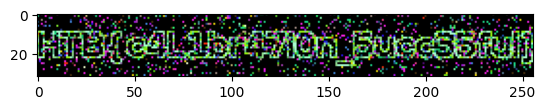

In [171]:
import numpy as np

# Map classfiication result to image and filtering noise

flag = np.zeros((32, 256, 3), dtype=np.uint8)
kamus = dict()
for i in range(100):
    kamus[i] = 0
x = 0
for i in range(32):
    for j in range(256):
        kamus[predicted_labels[x]] +=  1
        x += 1

print(kamus)
x = 0
for i in range(32):
    for j in range(256):
        label = predicted_labels[x]
        x += 1

        # yep. manually filtering this
        if(label == 37 or label == 12 or label == 76 or label == 68 or label == 17 ):
            continue

        color = colors[label]
        # print(label, color, i, j)
        flag[i][j] = color


plt.imshow(flag, cmap="gray")
plt.show()

# HTB{c4L1br47i0n_5ucc35fu1}

In [168]:
#  Sort classification count. Filter highest number and flag should be able to retrieved

d = {0: 0, 1: 7, 2: 106, 3: 4, 4: 9, 5: 17, 6: 22, 7: 0, 8: 1, 9: 37, 10: 16, 11: 238, 12: 1515, 13: 11, 14: 0, 15: 0, 16: 14, 17: 935, 18: 19, 19: 13, 20: 0, 21: 19, 22: 3, 23: 35, 24: 0, 25: 0, 26: 9, 27: 0, 28: 0, 29: 0, 30: 2, 31: 20, 32: 44, 33: 127, 34: 0, 35: 368, 36: 8, 37: 1200, 38: 20, 39: 12, 40: 1, 41: 0, 42: 5, 43: 11, 44: 0, 45: 5, 46: 245, 47: 0, 48: 21, 49: 31, 50: 10, 51: 0, 52: 0, 53: 0, 54: 10, 55: 24, 56: 17, 57: 0, 58: 14, 59: 37, 60: 35, 61: 0, 62: 4, 63: 16, 64: 9, 65: 6, 66: 5, 67: 3, 68: 1050, 69: 78, 70: 0, 71: 131, 72: 15, 73: 20, 74: 0, 75: 13, 76: 1053, 77: 0, 78: 1, 79: 0, 80: 13, 81: 110, 82: 0, 83: 2, 84: 42, 85: 64, 86: 0, 87: 3, 88: 23, 89: 0, 90: 50, 91: 0, 92: 3, 93: 0, 94: 9, 95: 25, 96: 35, 97: 22, 98: 90, 99: 0}

sorted_d = dict(sorted(d.items(), key=lambda x: x[1], reverse=True))
sorted_d

{12: 1515,
 37: 1200,
 76: 1053,
 68: 1050,
 17: 935,
 35: 368,
 46: 245,
 11: 238,
 71: 131,
 33: 127,
 81: 110,
 2: 106,
 98: 90,
 69: 78,
 85: 64,
 90: 50,
 32: 44,
 84: 42,
 9: 37,
 59: 37,
 23: 35,
 60: 35,
 96: 35,
 49: 31,
 95: 25,
 55: 24,
 88: 23,
 6: 22,
 97: 22,
 48: 21,
 31: 20,
 38: 20,
 73: 20,
 18: 19,
 21: 19,
 5: 17,
 56: 17,
 10: 16,
 63: 16,
 72: 15,
 16: 14,
 58: 14,
 19: 13,
 75: 13,
 80: 13,
 39: 12,
 13: 11,
 43: 11,
 50: 10,
 54: 10,
 4: 9,
 26: 9,
 64: 9,
 94: 9,
 36: 8,
 1: 7,
 65: 6,
 42: 5,
 45: 5,
 66: 5,
 3: 4,
 62: 4,
 22: 3,
 67: 3,
 87: 3,
 92: 3,
 30: 2,
 83: 2,
 8: 1,
 40: 1,
 78: 1,
 0: 0,
 7: 0,
 14: 0,
 15: 0,
 20: 0,
 24: 0,
 25: 0,
 27: 0,
 28: 0,
 29: 0,
 34: 0,
 41: 0,
 44: 0,
 47: 0,
 51: 0,
 52: 0,
 53: 0,
 57: 0,
 61: 0,
 70: 0,
 74: 0,
 77: 0,
 79: 0,
 82: 0,
 86: 0,
 89: 0,
 91: 0,
 93: 0,
 99: 0}